# 信号处理

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
# 使用Science风格的配置文件
plt.style.use('science')

## 信号处理类

## 图像绘制

In [3]:
# 绘图属性
# def wavePlot(t, UTWave, UTWave2 = np.arange(1, 1)):
def wavePlot(t, UTWave):
    # 中文字体处理
    matplotlib.rcParams['font.family'] = 'SimHei'
    plt.rcParams['axes.unicode_minus']=False
    # 绘制
    plt.plot(t, UTWave, color='white', marker='', linewidth='1', linestyle='-')
    # 如果第二个波存在则画出来
    # if UTWave2.size > 1: plt.plot(t, UTWave2, color='white', marker='', linewidth='1', linestyle='-')
    plt.title(r'$\rm \it UT\ Ascan\ Signal$')
    plt.xlabel(r'$\rm \it Time \ (\mu s)$', fontsize=10)
    plt.ylabel(r'$\rm \it Amplitude \ (\%) $', fontsize=10)
    plt.grid(linestyle='--')
    # 设置刻度值间距
    x_major_locator = plt.MultipleLocator(0.5)
    # y_major_locator = plt.MultipleLocator(5)
    ax = plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)
    # 修改坐标轴刻度值颜色大小
    plt.xticks(fontsize=10, color='black') 
    plt.yticks(fontsize=10, color='black')
    x1_label = ax.get_xticklabels() 
    # 设置刻度值字体
    [x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
    y1_label = ax.get_yticklabels() 
    [y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
    # 修改坐标轴背景颜色
    ax.patch.set_facecolor("black")
    # 修改Figure背景颜色
    # fig=plt.gcf()
    # fig.set_facecolor('green')
    # plt.xlim(-1, 7)
    # plt.ylim(0, 100)
    plt.show()

In [2]:
def scienceWavePlot(t, wave, wave2 = np.arange(1, 1), ylimFactor = 1.3):
    with plt.style.context(["science", "ieee", "no-latex"]):
            plt.plot(t, wave, label=r'$\rm Wave\ Function$') # 加上Label
            if wave2.size > 1: plt.plot(t, wave2, label=r'$\rm Wave2$')
            plt.legend(loc='upper right')
            plt.xlabel(r'$\rm x$')
            plt.ylabel(r'$\rm signal$')
            # plt.xlim(-1, 1)
            plt.ylim(np.min(wave), np.max(wave) * ylimFactor)
            plt.show()

## 信号

### 从文件中提取信号

In [ ]:
# 相对路径，或绝对路径；使用 NumPy 导入csv数据
def getSignal(file):
    with open(file, 'rt') as raw_data:
    	data = np.loadtxt(raw_data, delimiter=',')
    # 时间轴列表
    t = data[:, 0]
    # 信号幅值列表
    UTWave = data[:, 1]
    # 计算采样率
    sampleRate = (t.size - 1)/(t[-1] - t[0])
    return t, UTWave, sampleRate

t, UTWave, sampleRate = getSignal('Ascan.csv')
wavePlot(t, UTWave)

### 自定义绘制函数信号

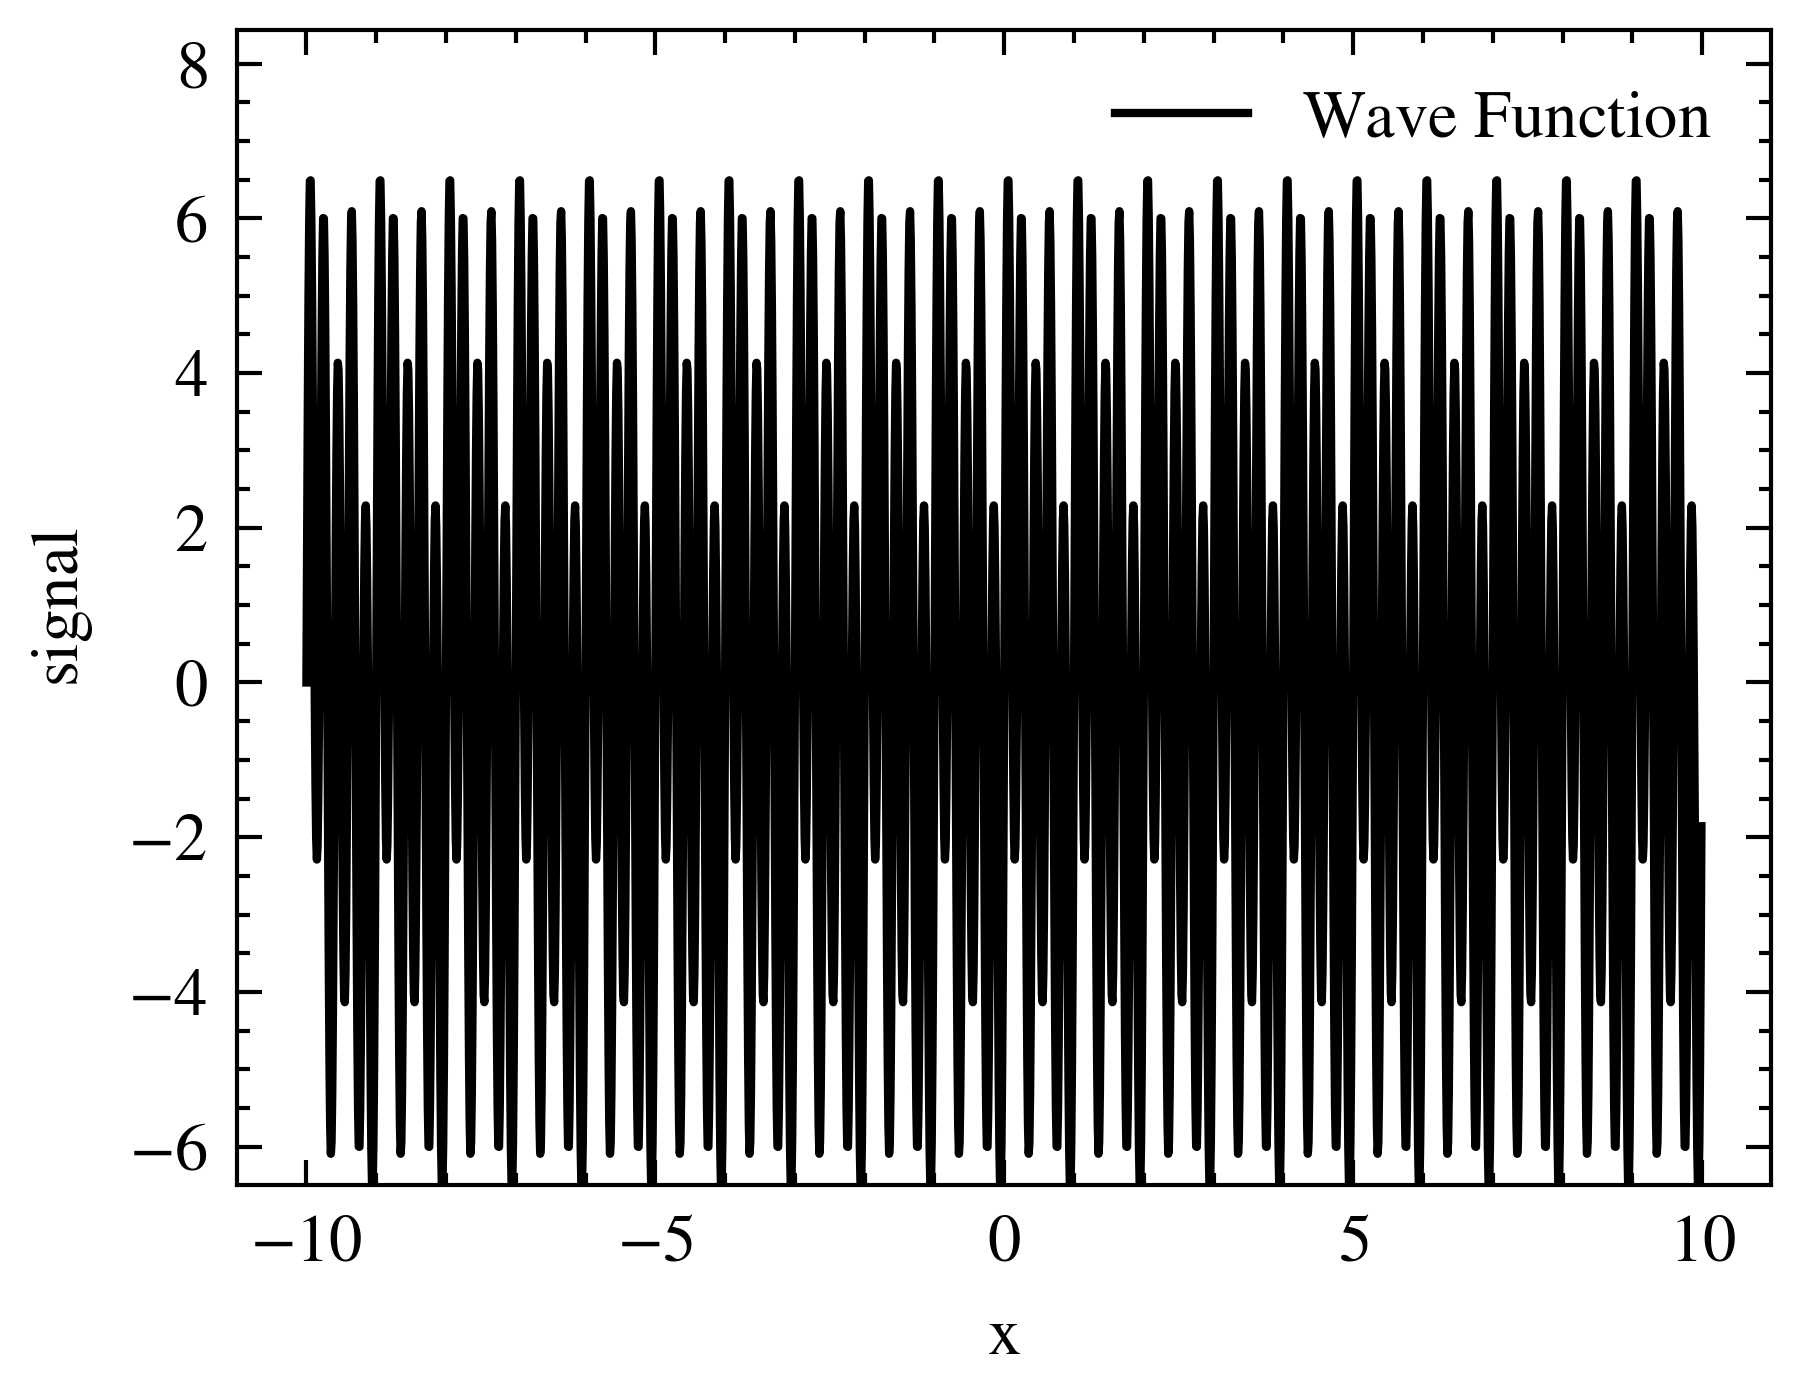

In [10]:
# 绘制自定义函数图像
# 采样率为 100Hz
Fs = 100
#采样点数为1000
Size = 1000
# 信号时长 t=10s
t = np.arange(-Size, Size)/Fs
# 三角函数
# UTWave = np.sin(2*np.pi*1*t) * 1.5
UTWave = np.sin(2*np.pi*1*t) + 2*np.sin(2*np.pi*2*t) + 5*np.sin(2*np.pi*5*t)

scienceWavePlot(t, UTWave)

## 数据拟合

In [ ]:
# 曲线拟合，返回值为多项式的各项系数
z1 = np.polyfit(t, UTWave, 3)
# 返回值为多项式的表达式，也就是函数式子
p1 = np.poly1d(z1)
# 无法直接放入列表进行操作
UTPoly = p1(t)
# p1([1, 2])

## 信号特征提取

特征提取，主要是提取一些统计指标，其他的特征需要结合领域知识进行提取。统计指标包括有量纲指标和无量纲指标。
- 有量纲指标包含：最大值max_y, 最小值min_y, 中位数median_y, 均值mean_y, 方差var_y, 峰值peak, 峰峰值peak2peak, 有效值rms等。
- 无量纲指标包含：峰值因子crestf, 裕度因子margin, 脉冲因子pulse, 波形因子waveform, 峭度因子kur, 偏度因子sk等。
- 在信号表征时，有量纲指标虽然对信号特征比较敏感，但也会因工作条件（如负载）的变化而变化，并极易受环境干扰的影响，具有表现不够稳定的缺陷。相比而言，无量纲指标能够排除这些扰动因素的影响，因而被广泛应用于特征提取的领域当中。中。

In [ ]:
# 均值
average_sgnal = np.sum([x for x in UTWave]) / len(UTWave)
# 均方值是信号的平方的平均（信号→平方→平均值），代表了信号的能量，是二阶矩
meanSquare = np.sum([x ** 2 for x in UTWave]) / len(UTWave)
# 均方根（RMS）又叫有效值。将所有值平方求和，求其均值，再开平方，就得到均方根值
root_mean = np.sqrt(np.sum([x ** 2 for x in UTWave]) / len(UTWave))
# 方差是每个样本值与全体样本值的平均数之差的平方值的平均数，代表了信号能量的动态分量（均值的平方是静态分量），是二阶中心距
variance = np.sum([(x - meanSquare) ** 2 for x in UTWave]) / len(UTWave)
# 标准差
stdVariance = np.sqrt(variance)
# 正负峰值
peakPositive = np.max(UTWave)
peakNegative = np.min(UTWave)
# 峰值指标
crest_factor =  np.max(UTWave)/root_mean
# 波形指标
shape_factor = root_mean/abs(np.sum([x for x in UTWave]) / len(UTWave))
# 脉冲指标
impulse_factor = np.max(UTWave)/abs(np.sum([x for x in UTWave]) / len(UTWave))

### 某一范围的数据特征

In [ ]:
def extractAreaSignalCharacter(t, UTWave, origin, end):
    z1 = np.polyfit(t, UTWave, 3)
    p1 = np.poly1d(z1)
    x = np.linspace(origin, end, 0.1)
    UTWave_area = p1(x)
    print(np.max(UTWave_area))
extractAreaSignalCharacter(t, UTWave, 0, 4.1)

## 波形处理

### 方波

In [ ]:
squareWave = UTWave > 0
wavePlot(t, squareWave)

### 三角波

In [ ]:
# 消除直流分量
squareWave = squareWave - np.mean(squareWave)
triangleWave = np.zeros(t.size)

# 积分
sum = 0
for i in range(t.size):
    sum += squareWave[i]
    triangleWave[i] = sum
# 归一化
triangleWave /= np.max(squareWave)
wavePlot(t, triangleWave)

## 频域分析

In [8]:
# 频率分析函数
def fAnalysis(t, UTWave):
    # 采样点数
    N=len(t)
    # 乘上这个因子，横轴才是正确的
    df = 1/(t[-1] - t[0])
    f = [df*n for n in range(0, int(N/2))]
    UTWave_f = np.fft.fft(UTWave)*2/N  #*2/N 反映了FFT变换的结果与实际信号幅值之间的关系
    # UTWave_f_abs = [np.abs(x) for x in UTWave_f]      #求傅里叶变换结果的模
    
    # 单边处理
    f = f[0: int(N/2)]
    UTWave_f = np.abs(UTWave_f[0: int(N/2)])
    # UTWave_f_abs = UTWave_f_abs[0: int(N/2)]
    scienceWavePlot(f, UTWave_f)

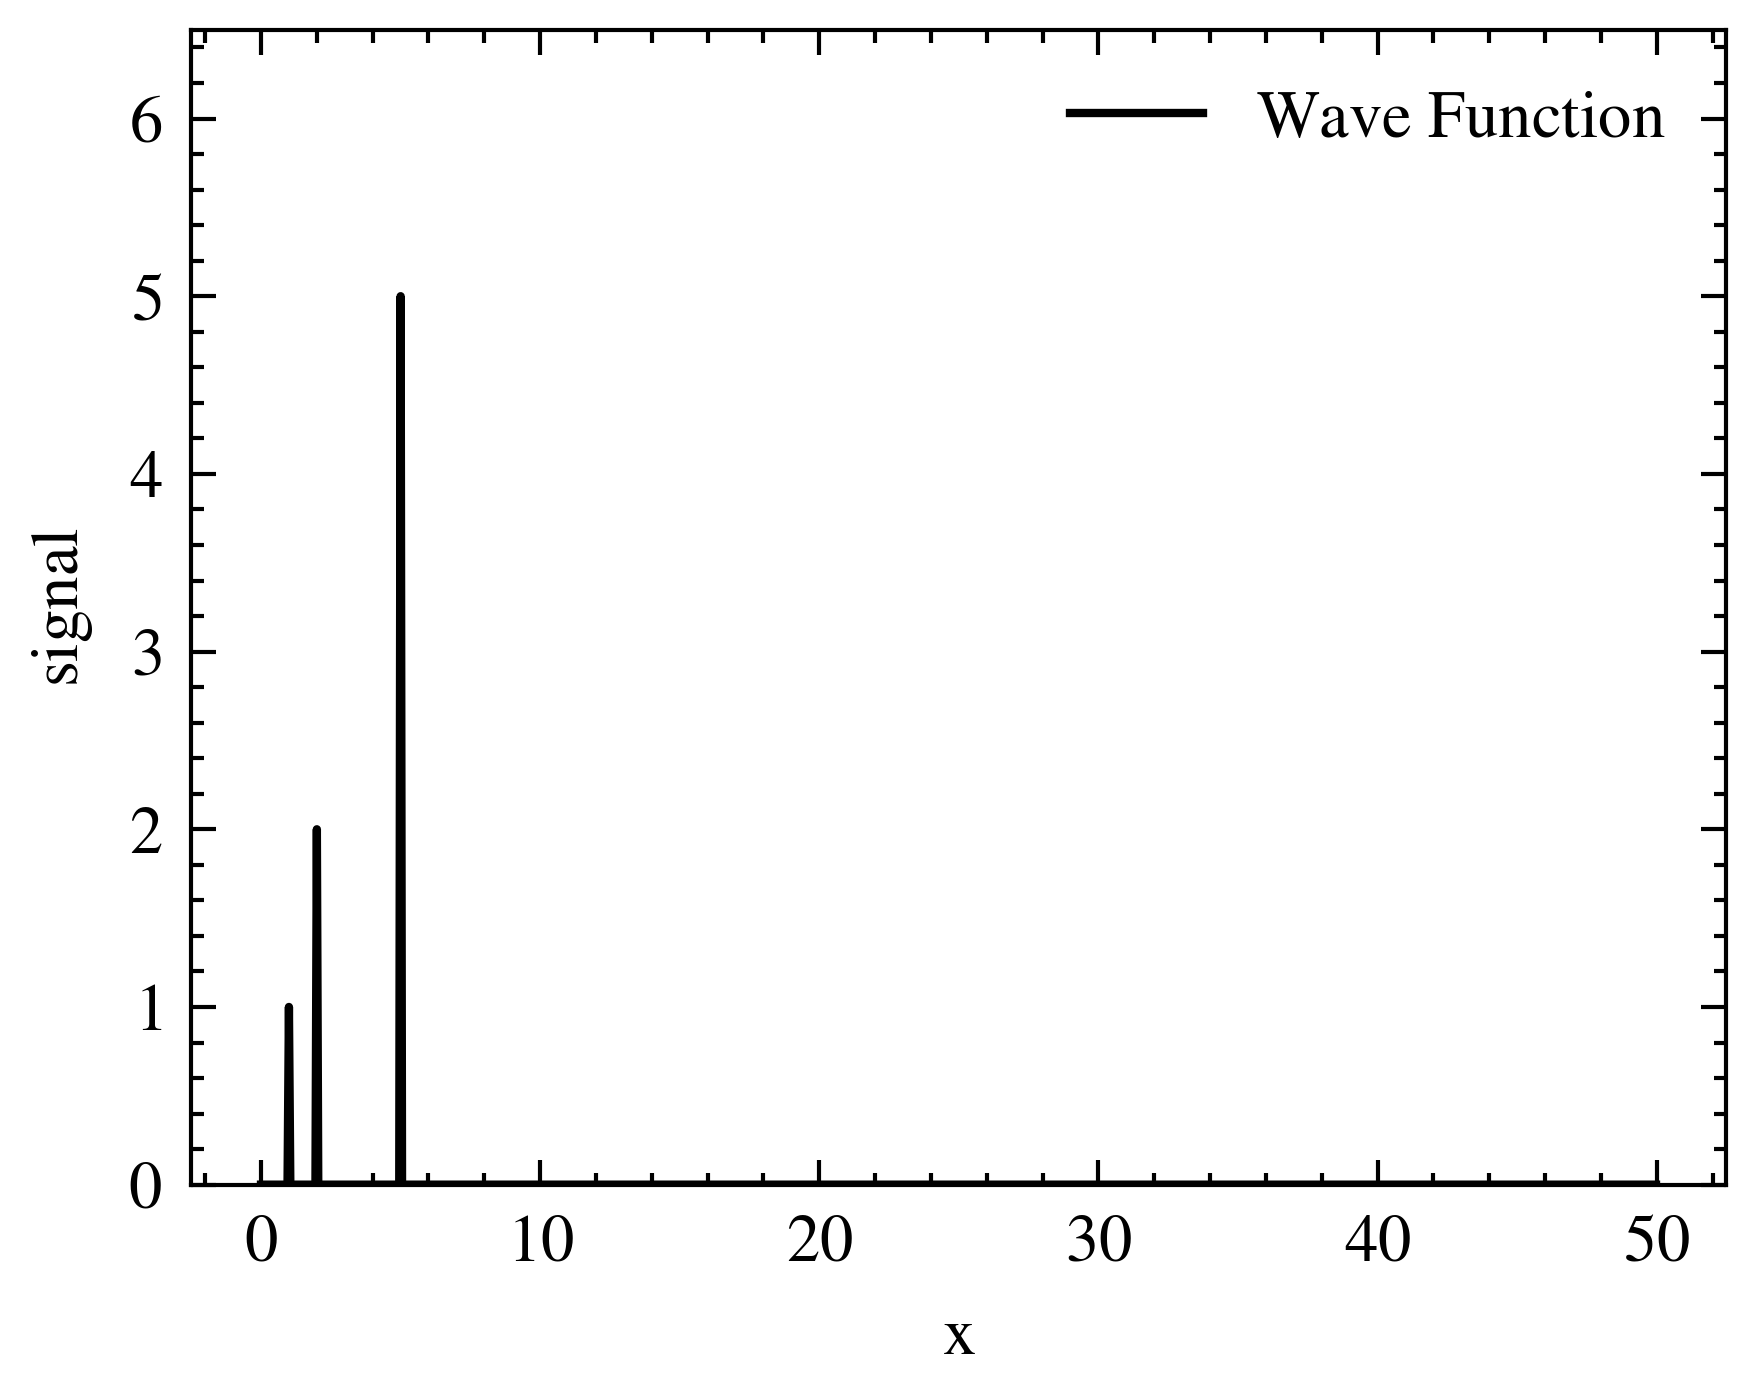

In [11]:
fAnalysis(t, UTWave)

## 滤波

### 低通滤波

In [ ]:
# 阈值
threshold = 15
wn = 2*threshold/sampleRate

# 滤波参数
# 配置滤波器 8 表示滤波器的阶数
b, a = signal.butter(8, wn , 'lowpass' )
# data 为要过滤的信号
filtedData = signal.filtfilt(b, a, UTWave)
# wavePlot(t, UTWave)
fAnalysis(t, filtedData)

### 高通滤波

In [ ]:
threshold = 20
wn = 2*threshold/sampleRate

b, a = signal.butter(8, wn, 'highpass')
filtedData = signal.filtfilt(b, a, UTWave)
fAnalysis(t, filtedData)

### 带通滤波

In [ ]:
# 带通，band为频率范围
band = np.linspace(2, 20)
wn_band = band * 2/sampleRate
b, a = signal.butter(8, wn_band, 'bandpass')
filtedData = signal.filtfilt(b, a, UTWave)
fAnalysis(t, filtedData)

## 噪声处理

### 生成随机高斯白噪声

信噪比：
$$SNR = 10 \rm log_{10}{P_s \over P_n}$$
$\rm P_s$和$\rm P_n$分别表示信号和噪声的有效功率，信噪比$SNR$单位为$\rm dB$，则$x(t)$和$n(t)$分别为信号和噪声

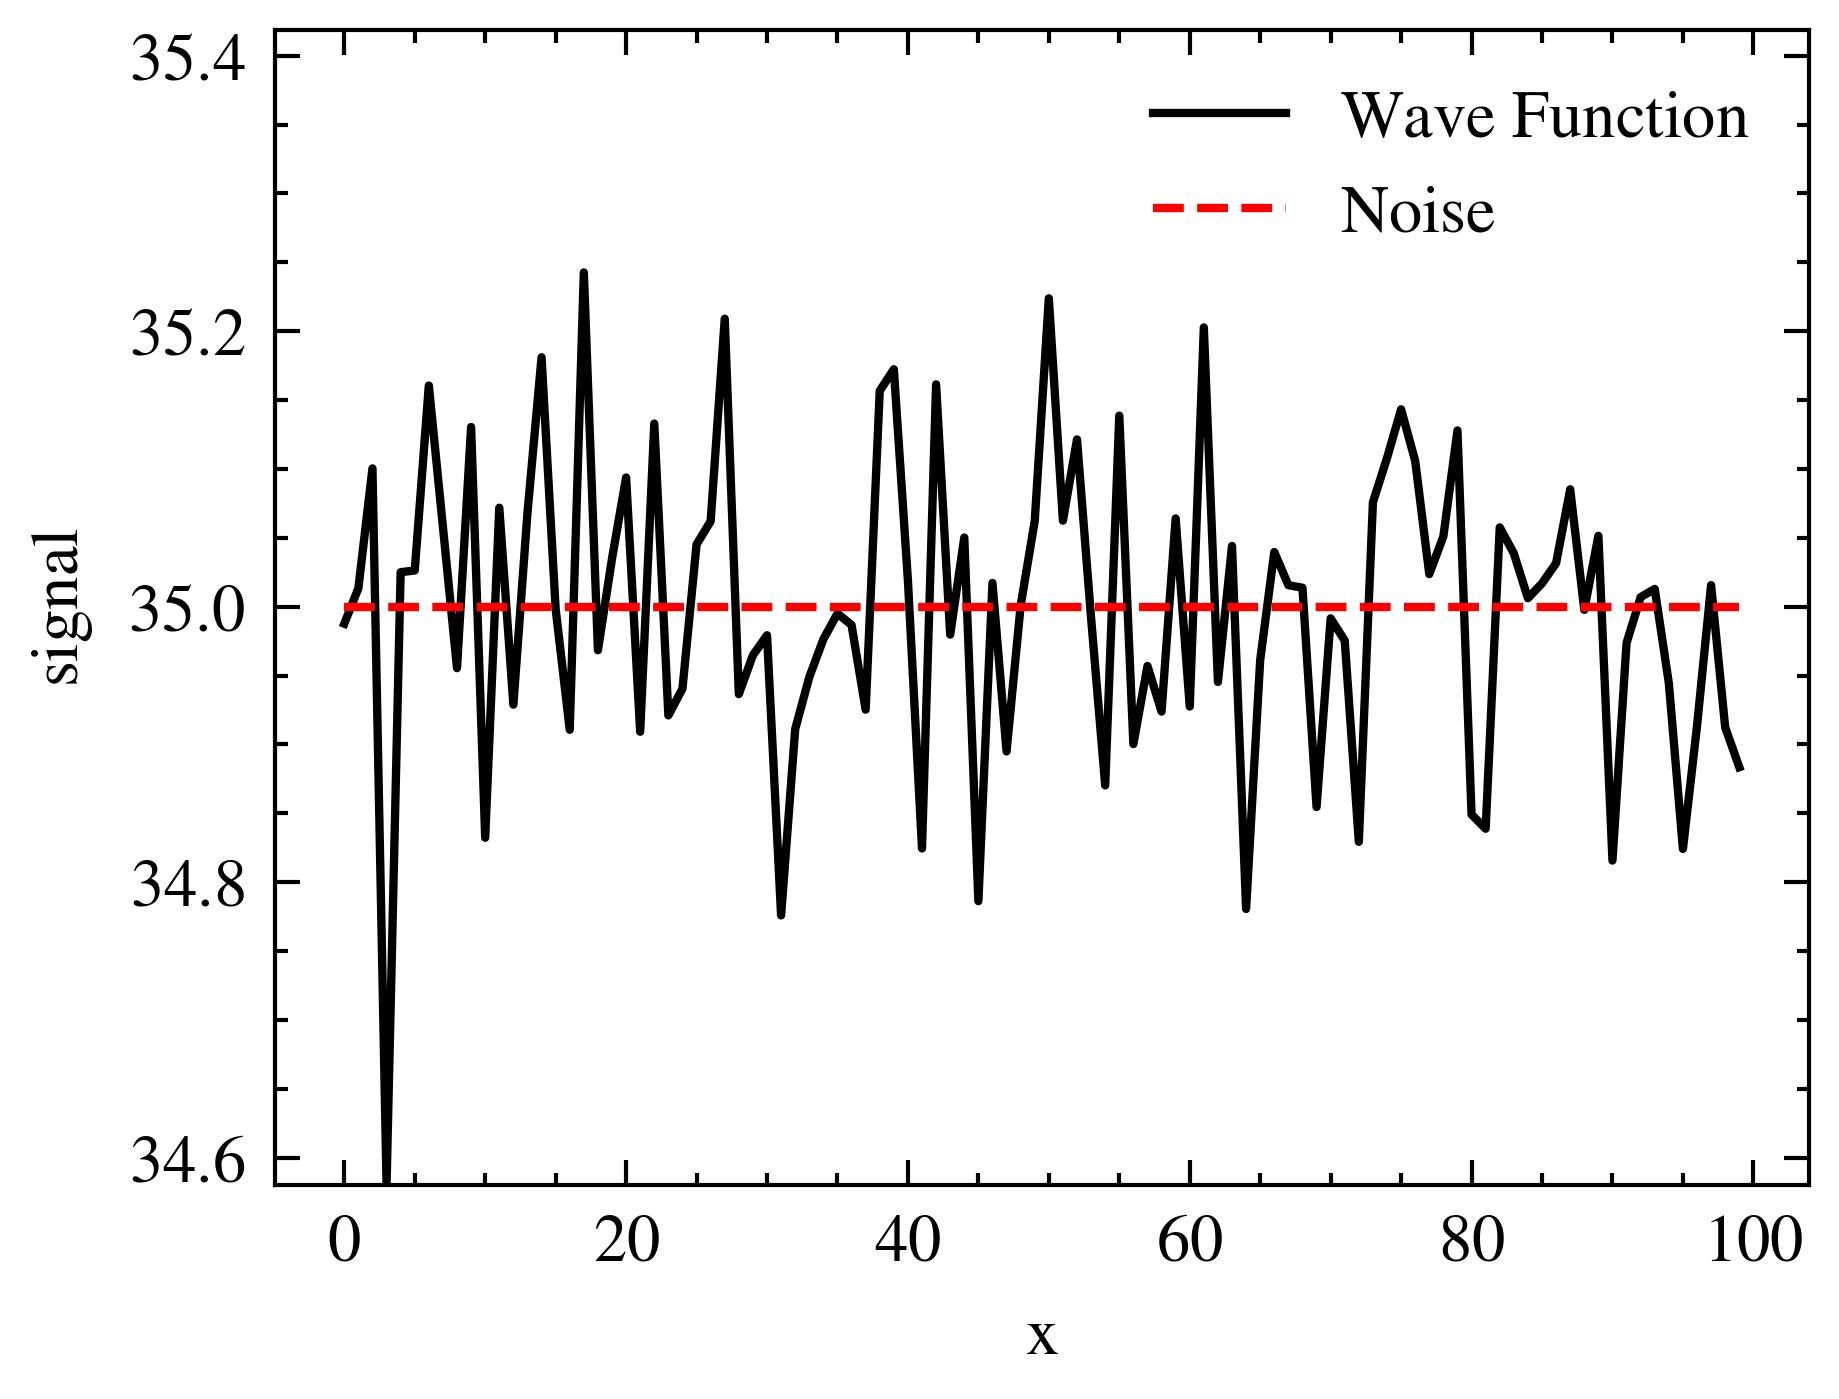

In [30]:
def wgn(x, snr):
    batch_size, len_x = x.shape
    Ps = np.sum(np.power(x, 2)) / len_x
    Pn = Ps / (np.power(10, snr / 10))
    noise = np.random.randn(len_x) * np.sqrt(Pn)
    return x + noise

T = 100
x = np.zeros((1, T)) + 35.
# 信噪比
snr = 50
# 生成噪声
noise1 = wgn(x, snr)[0, :]
t1 = np.arange(x.size)
# 传入第二个函数x[0]
scienceWavePlot(t1, noise1, x[0], 1.005)
# wavePlot(t1, noise1, 1)

### 高斯噪声

In [ ]:
# 方差为 4 的高斯噪声（正态分布）
noise = np.random.randn(t.size)*2
wavePlot(t, noise)

### 均匀噪声

In [ ]:
# 在-0.5到0.5之间均匀分布的噪声
n2 = np.random.rand(t.size)*2
n2 -= np.mean(n2)
wavePlot(t, n2)

## 平均

> 这里假设生成n次随机噪声，然后对这些噪声作平均

In [ ]:
def UTAverage(n, x, snr):
    wgnZero = wgn(x, snr)[0, :]
    for i in np.arange(1, n):
        wgnZero += wgn(x, snr)[0, :]
    wgnZero = wgnZero/n
    plt.plot(wgnZero)
    plt.plot(x[0])
    plt.ylim(30, 40)
    plt.show()

# 信号
x = np.zeros((1, T)) + 35.
snr = 50
# 平均 2 次
UTAverage(1, x, snr)
# 平均 20000次
UTAverage(20, x, snr)